# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:47:38.768951: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:47:42.328283
2025-04-14 20:47:42.328283


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:47:36"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

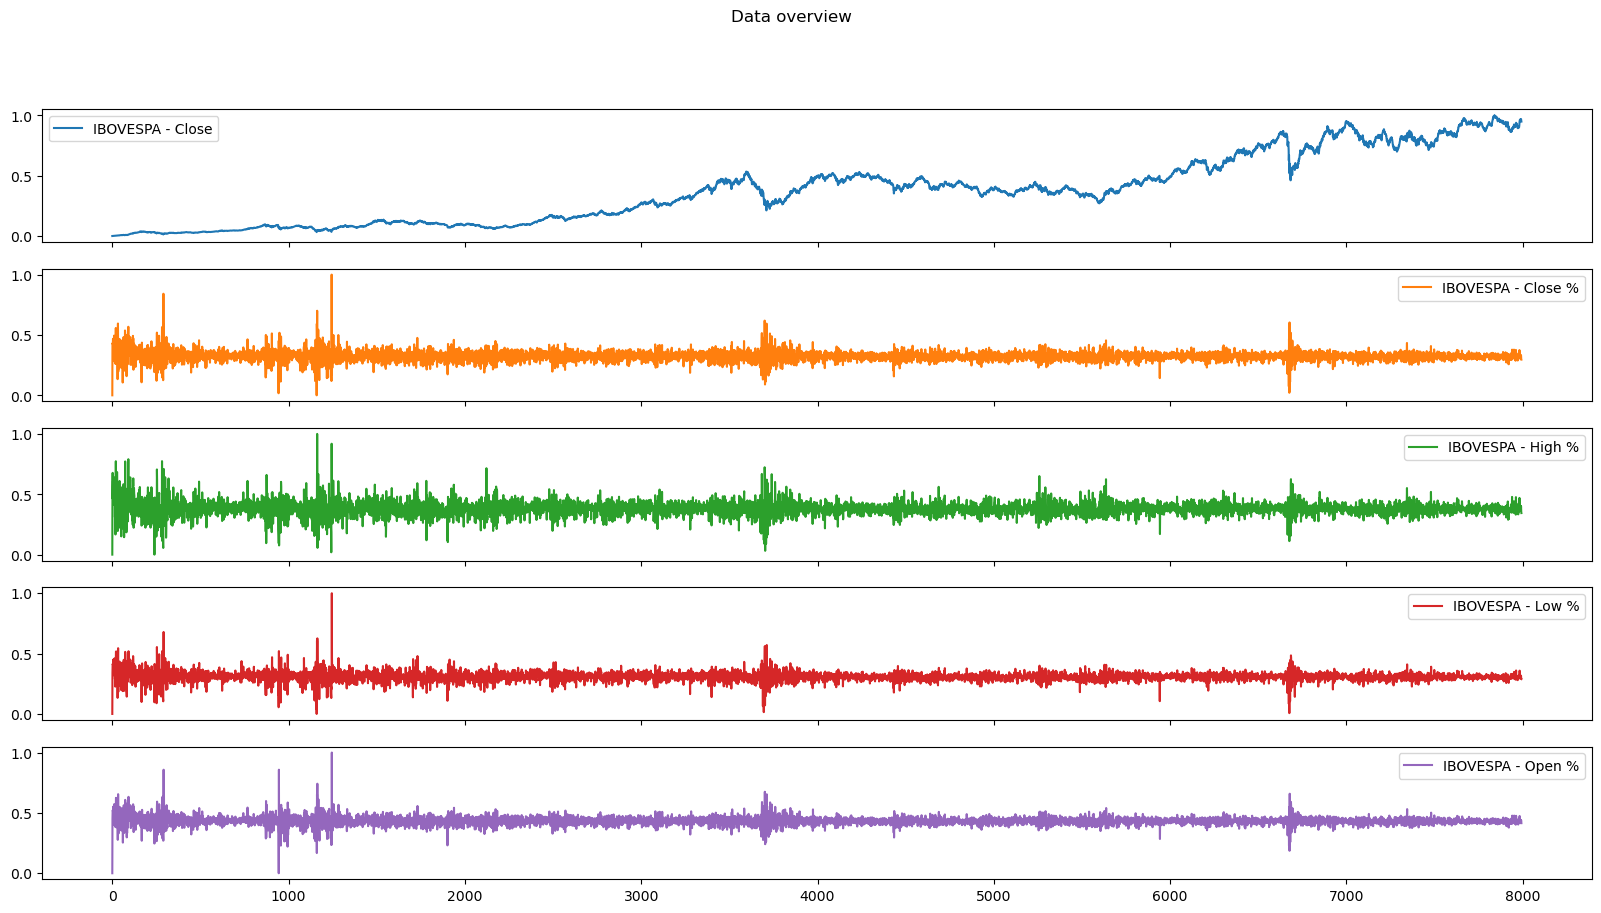

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

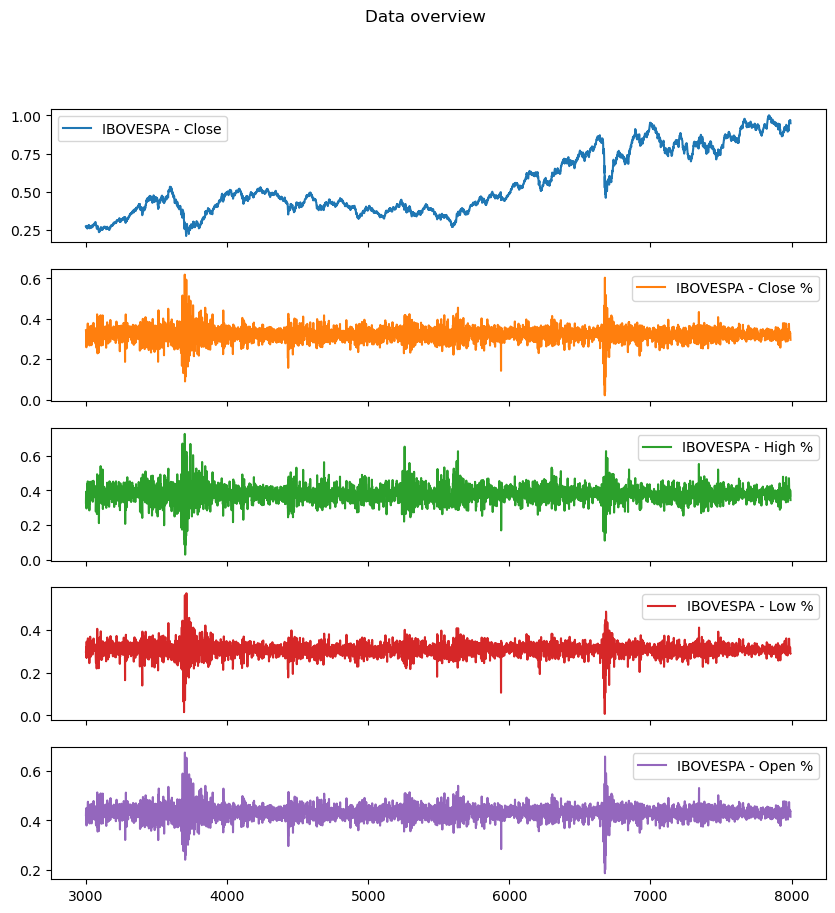

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

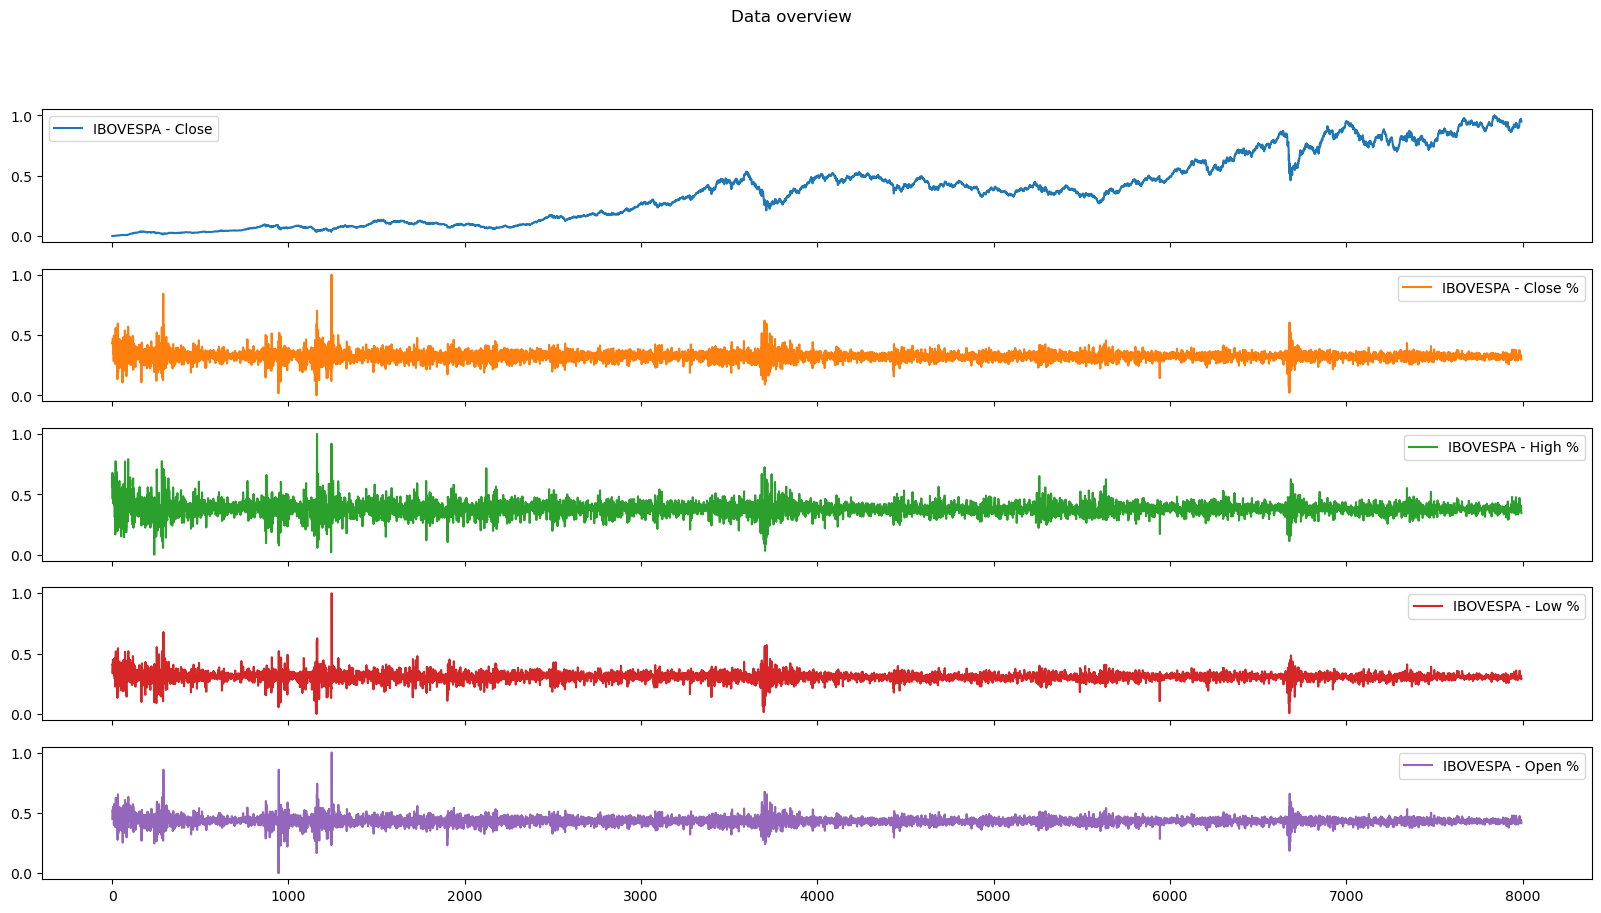

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

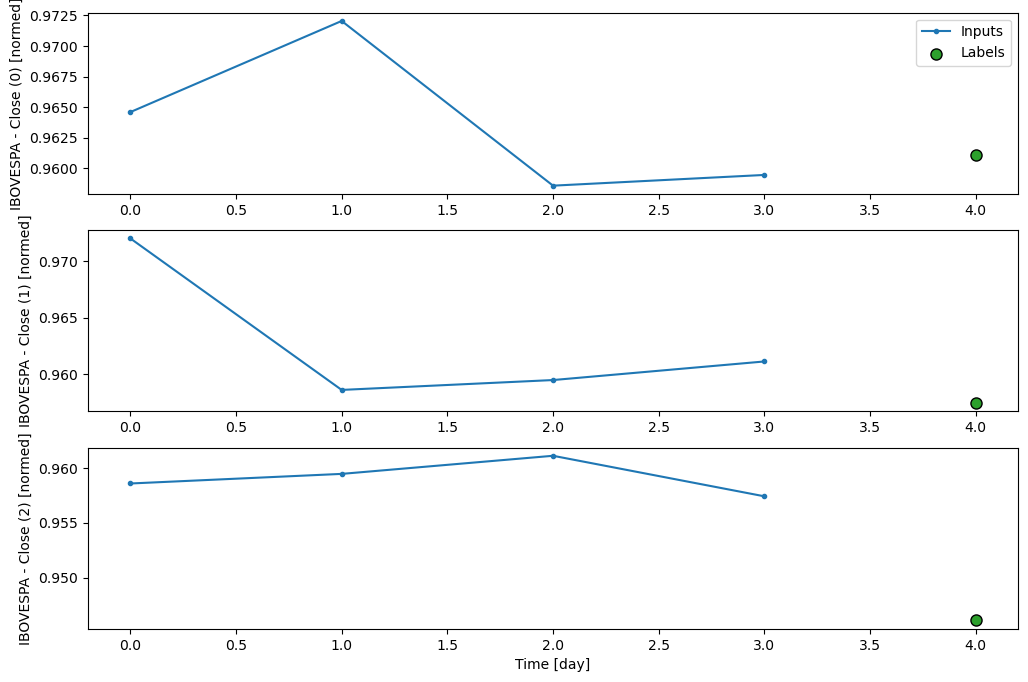

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17:21 4s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.7214 - mean_squared_error: 5.5786e-05 - root_mean_squared_error: 0.0073   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.6665 - mean_squared_error: 5.5906e-05 - root_mean_squared_error: 0.0074

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 47.7407 - mean_squared_error: 5.4805e-05 - root_mean_squared_error: 0.0073

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 42.5633 - mean_squared_error: 7.1354e-05 - root_mean_squared_error: 0.0082

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.3624 - mean_squared_error: 9.4721e-05 - root_mean_squared_error: 0.0093

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 37.0750 - mean_squared_error: 1.2295e-04 - root_mean_squared_error: 0.0105

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.1317 - mean_squared_error: 1.4223e-04 - root_mean_squared_error: 0.0113

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.5472 - mean_squared_error: 1.5625e-04 - root_mean_squared_error: 0.0118

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.1865 - mean_squared_error: 1.7530e-04 - root_mean_squared_error: 0.0126

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 31.1893 - mean_squared_error: 1.8828e-04 - root_mean_squared_error: 0.0130

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 30.1111 - mean_squared_error: 2.1524e-04 - root_mean_squared_error: 0.0139

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 29.2699 - mean_squared_error: 2.5118e-04 - root_mean_squared_error: 0.0148

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 28.5234 - mean_squared_error: 3.0429e-04 - root_mean_squared_error: 0.0160

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 27.9905 - mean_squared_error: 4.0014e-04 - root_mean_squared_error: 0.0177

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 27.5185 - mean_squared_error: 5.9843e-04 - root_mean_squared_error: 0.0204

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 27.1030 - mean_squared_error: 7.9956e-04 - root_mean_squared_error: 0.0229

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 26.6944 - mean_squared_error: 9.7255e-04 - root_mean_squared_error: 0.0252

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 26.3026 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0271    

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 25.9212 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 25.5186 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0305

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 25.1873 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0319

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 24.8811 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 24.5764 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0346

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 24.2920 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 24.0233 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0373

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 23.7877 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 23.6720 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0390 - val_loss: 0.1741 - val_mean_absolute_error: 0.1741 - val_mean_absolute_percentage_error: 18.6864 - val_mean_squared_error: 0.0318 - val_root_mean_squared_error: 0.1784 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.7401 - mean_absolute_error: 0.7401 - mean_absolute_percentage_error: 31914.6699 - mean_squared_error: 0.5477 - root_mean_squared_error: 0.7401

  5/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 18853.8848 - mean_squared_error: 0.5357 - root_mean_squared_error: 0.7319 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7149 - mean_absolute_error: 0.7149 - mean_absolute_percentage_error: 14135.7939 - mean_squared_error: 0.5123 - root_mean_squared_error: 0.7155

 15/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6844 - mean_absolute_error: 0.6844 - mean_absolute_percentage_error: 10820.5898 - mean_squared_error: 0.4733 - root_mean_squared_error: 0.6868

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6595 - mean_absolute_error: 0.6595 - mean_absolute_percentage_error: 9491.1748 - mean_squared_error: 0.4477 - root_mean_squared_error: 0.6670 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.6336 - mean_absolute_error: 0.6336 - mean_absolute_percentage_error: 8500.4443 - mean_squared_error: 0.4243 - root_mean_squared_error: 0.6483

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5999 - mean_absolute_error: 0.5999 - mean_absolute_percentage_error: 7550.3130 - mean_squared_error: 0.3953 - root_mean_squared_error: 0.6239

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5676 - mean_absolute_error: 0.5676 - mean_absolute_percentage_error: 6812.7959 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.6006

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5383 - mean_absolute_error: 0.5383 - mean_absolute_percentage_error: 6222.5049 - mean_squared_error: 0.3455 - root_mean_squared_error: 0.5791

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 5921.1587 - mean_squared_error: 0.3329 - root_mean_squared_error: 0.5672

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 5486.3223 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5486

 53/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4662 - mean_absolute_error: 0.4662 - mean_absolute_percentage_error: 4985.4814 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5254

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 4577.4043 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.5048

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 4282.8276 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4889

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - mean_absolute_percentage_error: 3988.6143 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4722

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 3736.2917 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4572

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 3517.2363 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4435

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 3325.0405 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4311

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 3154.8904 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4197

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 3023.7522 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4106

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 2904.2368 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4021

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 2777.4927 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3930

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 2662.5305 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3846

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 2557.6758 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3767

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 2461.6042 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3693

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 2373.2341 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3624 

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 2302.9055 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3568

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 2237.0515 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3515

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 2165.3088 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3456

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 2107.7522 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3407

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 2044.7451 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3354

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1993.9719 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3310

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1938.1681 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3261

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1907.8134 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3235

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1893.0288 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3222

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1871.3243 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3203

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1850.1650 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3184

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1822.7629 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3160

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1789.7522 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3131

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1758.0408 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3103

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 1733.5557 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3081

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1709.8119 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3060

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 1681.1241 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3034

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 1653.4790 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3009

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 1642.7137 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2999 - val_loss: 0.1772 - val_mean_absolute_error: 0.1772 - val_mean_absolute_percentage_error: 19.0181 - val_mean_squared_error: 0.0329 - val_root_mean_squared_error: 0.1813 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.7179 - mean_absolute_error: 0.7179 - mean_absolute_percentage_error: 30959.0273 - mean_squared_error: 0.5154 - root_mean_squared_error: 0.7179

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7009 - mean_absolute_error: 0.7009 - mean_absolute_percentage_error: 15547.4590 - mean_squared_error: 0.4917 - root_mean_squared_error: 0.7011  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6772 - mean_absolute_error: 0.6772 - mean_absolute_percentage_error: 10915.1982 - mean_squared_error: 0.4605 - root_mean_squared_error: 0.6781

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6523 - mean_absolute_error: 0.6523 - mean_absolute_percentage_error: 8773.5898 - mean_squared_error: 0.4300 - root_mean_squared_error: 0.6545 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6220 - mean_absolute_error: 0.6220 - mean_absolute_percentage_error: 7441.3779 - mean_squared_error: 0.3982 - root_mean_squared_error: 0.6283

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5851 - mean_absolute_error: 0.5851 - mean_absolute_percentage_error: 6496.7949 - mean_squared_error: 0.3665 - root_mean_squared_error: 0.6006

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5537 - mean_absolute_error: 0.5537 - mean_absolute_percentage_error: 5877.8721 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5780

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 5304.6763 - mean_squared_error: 0.3171 - root_mean_squared_error: 0.5540

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - mean_absolute_percentage_error: 4844.3037 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5324

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - mean_absolute_percentage_error: 4465.3755 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.5130

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - mean_absolute_percentage_error: 4147.5093 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4956

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 3841.2510 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4777

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 3612.0027 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4636

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 3411.4390 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4507

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 3234.2688 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4388

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 3076.5056 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4279

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 2935.0352 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4178

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 2824.8630 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4098

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 2739.9143 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.4035

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 2630.1262 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3952

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 2529.7056 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3874

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 2450.1882 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3812

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 2352.4348 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3733

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 2252.3132 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3650

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 2161.2131 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3573

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 2077.9324 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3501

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 2001.4802 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3433

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1931.0378 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3370

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1865.9041 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3311

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1805.4813 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3257

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1743.2371 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3201

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1691.1396 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3153

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1658.2914 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3123 - val_loss: 0.1528 - val_mean_absolute_error: 0.1528 - val_mean_absolute_percentage_error: 16.3797 - val_mean_squared_error: 0.0248 - val_root_mean_squared_error: 0.1575 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7011 - mean_absolute_error: 0.7011 - mean_absolute_percentage_error: 30239.4824 - mean_squared_error: 0.4915 - root_mean_squared_error: 0.7011

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6836 - mean_absolute_error: 0.6836 - mean_absolute_percentage_error: 12730.7803 - mean_squared_error: 0.4677 - root_mean_squared_error: 0.6838 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - mean_absolute_percentage_error: 9130.7295 - mean_squared_error: 0.4407 - root_mean_squared_error: 0.6634 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6276 - mean_absolute_error: 0.6276 - mean_absolute_percentage_error: 7208.2637 - mean_squared_error: 0.4029 - root_mean_squared_error: 0.6328

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5854 - mean_absolute_error: 0.5854 - mean_absolute_percentage_error: 6121.1978 - mean_squared_error: 0.3662 - root_mean_squared_error: 0.6008

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5488 - mean_absolute_error: 0.5488 - mean_absolute_percentage_error: 5424.7568 - mean_squared_error: 0.3371 - root_mean_squared_error: 0.5739

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5155 - mean_absolute_error: 0.5155 - mean_absolute_percentage_error: 4886.1108 - mean_squared_error: 0.3121 - root_mean_squared_error: 0.5496

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4892 - mean_absolute_error: 0.4892 - mean_absolute_percentage_error: 4504.4170 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5305

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 4101.7524 - mean_squared_error: 0.2720 - root_mean_squared_error: 0.5084

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 3805.8342 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4909

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 3525.2295 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4732

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 3287.2649 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4573

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 3082.6064 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4430

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 2942.0620 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4328

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 2781.1150 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4207

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 2638.7075 - mean_squared_error: 0.1868 - root_mean_squared_error: 0.4097

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 2525.1099 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.4007

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 2409.6738 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3913

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 2316.4841 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3835

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 2220.7661 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3752

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 2133.4358 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3676

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 2053.4094 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3604

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1979.7880 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3536

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1911.8031 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3472

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1848.8055 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3413

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1796.5583 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3363

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1741.5563 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3309

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1690.1573 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3259

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1668.3893 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3237 - val_loss: 0.1497 - val_mean_absolute_error: 0.1497 - val_mean_absolute_percentage_error: 16.0414 - val_mean_squared_error: 0.0239 - val_root_mean_squared_error: 0.1545 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6129 - mean_absolute_error: 0.6129 - mean_absolute_percentage_error: 26496.5293 - mean_squared_error: 0.3757 - root_mean_squared_error: 0.6130

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5898 - mean_absolute_error: 0.5898 - mean_absolute_percentage_error: 11102.0049 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5903 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5582 - mean_absolute_error: 0.5582 - mean_absolute_percentage_error: 7903.9883 - mean_squared_error: 0.3155 - root_mean_squared_error: 0.5605 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5147 - mean_absolute_error: 0.5147 - mean_absolute_percentage_error: 6312.5210 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.5251

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 5305.3882 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4915

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 4538.3740 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4596

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3946 - mean_absolute_error: 0.3946 - mean_absolute_percentage_error: 4033.1250 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4355

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 3678.9932 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4169

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 3323.2812 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3967

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 3062.8640 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3809

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 2844.2683 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3669

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 2657.8008 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3544

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 2496.6360 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3432

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 2355.7910 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3330

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 2231.5322 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3237

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 2120.9902 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3151

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 2021.9443 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3073

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1942.1238 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3008

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1860.2667 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2939

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1785.6976 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2876

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 1717.4541 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2816

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 1654.7410 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2761

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 1596.8896 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2708

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 1549.0906 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2665

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1520.7941 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2639

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 1498.9724 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2619

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 1477.8331 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2599

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 1452.3186 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2576

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 1418.1897 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2544

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 1399.4700 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2527

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 1385.7960 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2514 - val_loss: 0.1071 - val_mean_absolute_error: 0.1071 - val_mean_absolute_percentage_error: 11.4411 - val_mean_squared_error: 0.0128 - val_root_mean_squared_error: 0.1131 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 16244.8613 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3755

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 8747.4238 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3626  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 5854.8301 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3379 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 4558.7241 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.3106

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 3876.1458 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2909

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 3322.9260 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2719

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 2973.5818 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2582

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 2698.6584 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2466

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 2442.4155 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2348

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 2235.6389 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2248

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 2064.6570 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2159

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 1920.7758 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2081

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1797.8033 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2011

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1691.2877 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1949

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 1597.9669 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1892

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1515.4467 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1840

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1441.8795 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1793

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1375.8384 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1749

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 1316.1857 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1708

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1254.6603 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1666

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1192.6348 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1621

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 1137.0377 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1580

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1086.8884 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1543

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1041.3966 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1508

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 995.5369 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1472 

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 961.9379 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1445

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 927.0083 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1416

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 898.2270 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1393

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 868.1195 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1367

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 840.1707 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1345

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 811.3625 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1322

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 784.6559 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1301 - val_loss: 0.0650 - val_mean_absolute_error: 0.0650 - val_mean_absolute_percentage_error: 6.9183 - val_mean_squared_error: 0.0050 - val_root_mean_squared_error: 0.0705 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 13279.5742 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.3078

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 5824.5020 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2868  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 3959.4966 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2567

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 3081.6919 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2320

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 2554.2927 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2134

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 2197.9897 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1989

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 1938.6549 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1873

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 1739.9409 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1777

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1598.1414 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1703

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 1480.0448 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1638

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1368.5353 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1574

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 1284.0236 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1523

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 1201.8197 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1472

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1130.5300 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1426

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 1068.0485 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1384

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1012.7811 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1346

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 963.5079 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1312 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 919.2693 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1280

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 879.3048 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1250

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 843.0046 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1223

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 809.8712 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1197

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 782.7573 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1176

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 754.5609 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1154

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 728.5192 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1133

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 704.3882 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1114

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 681.9656 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1096

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 661.0681 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1079

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 641.5417 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1063 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285 - val_mean_absolute_percentage_error: 3.0330 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0324 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 14531.4795 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3364

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 6379.8857 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.3162  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 4239.2666 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2864

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 3342.5508 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2612

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 2790.3972 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2417

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 2411.2063 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2259

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 2131.9214 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2128

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 1916.4865 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.2019

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 1744.7966 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1925

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 1590.4700 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1836

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1487.3046 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1774

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1387.6895 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1711

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 1301.8644 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1655

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1219.3273 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1599

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1154.3744 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1553

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 1096.6537 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1512

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1044.9780 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1473

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 998.4182 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1438 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 956.2245 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1405

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 917.7930 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1374

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 894.0121 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1355

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 860.7883 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1328

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 830.1825 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1302

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 801.8860 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1278

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 775.6388 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1256

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 751.2205 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1235

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 728.4412 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1215

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 714.0891 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1202 - val_loss: 0.0669 - val_mean_absolute_error: 0.0669 - val_mean_absolute_percentage_error: 7.1492 - val_mean_squared_error: 0.0050 - val_root_mean_squared_error: 0.0706 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 10297.4355 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2374

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 4230.0649 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2135  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 2921.4285 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1880

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 2236.8647 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1679

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 1869.6110 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1546

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1617.5323 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1444

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1431.9399 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1361

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 1288.9764 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1294

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1174.7548 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1236

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1081.0695 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1185

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1002.7031 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1141

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 936.0289 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1101 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 878.5255 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1066

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 828.3616 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1034

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 798.3107 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1015

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 770.5859 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0996

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 753.2600 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0985

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 736.7776 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0973

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 717.2670 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0960

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 695.3159 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0944

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 678.1293 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0932

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 661.8590 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0920

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 646.4299 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0909

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 631.7760 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0898

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 620.5712 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0890

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 615.1320 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0886

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 612.4520 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0884

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 607.1691 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0880

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 604.5654 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0878

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 594.3932 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0870

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 591.9092 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0868

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 589.4480 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0866

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 584.5930 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0862

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 582.1985 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0861

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 579.8258 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0859

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 577.4744 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0857

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 575.1440 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0855

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 572.8344 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0853

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 568.2762 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0850

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 566.0272 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0848

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 561.5878 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0844

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 559.3968 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0843

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 552.9361 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0838

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 548.7198 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0834

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 544.5740 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 538.4835 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0826

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 532.5426 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0821

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 528.6618 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 522.9571 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0814

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 519.2293 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0811

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 515.5598 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0808

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 513.7468 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0807

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 511.9479 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0805

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 510.1631 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0804

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 504.8900 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0800

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 501.4412 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0797

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 494.6977 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0792

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 484.9536 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0784 - val_loss: 0.0395 - val_mean_absolute_error: 0.0395 - val_mean_absolute_percentage_error: 4.1984 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0436 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 10374.6172 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2398

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 4811.4209 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2230  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 3419.6133 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.2043

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 2793.8557 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1890

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1684 - mean_absolute_error: 0.1684 - mean_absolute_percentage_error: 2443.1370 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1786

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 2135.1035 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1682

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1871.2672 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1583

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1751.4716 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1534

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 1672.4917 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1500

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1601.2535 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1469

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 1516.2837 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1430

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1423.4771 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1387

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 1358.0787 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1355

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 1313.3169 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1333

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 1258.5527 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1305

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1208.6808 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1278

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1163.0469 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1254

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1121.1189 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1230

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1082.4602 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1208

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 1038.1351 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1183

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1005.4875 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1163

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 967.7636 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1141 

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 919.9555 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1111

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 882.9677 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1087

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 871.3623 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1080

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 860.0923 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1073

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 843.7863 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1062

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 833.2930 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1055

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 823.0869 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1048

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 808.2887 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1038

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 794.0707 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1029

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 775.9554 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1016

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 762.9592 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1007

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 742.3394 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0993

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 722.9181 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0979

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 704.5908 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0966

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 690.6533 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0956

159/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 677.3132 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0946

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 655.2896 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0930

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 637.6344 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0916

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 618.3213 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0901

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 607.8556 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0893

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 602.7684 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0889

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 597.7747 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0885

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 590.4534 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0880

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 583.3280 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0874

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 574.1182 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0866

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 567.4191 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0861

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 560.8906 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0856

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 556.6295 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0852

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 550.3704 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0847

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 542.2637 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0841

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 534.4167 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0834

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 524.9546 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0827

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 515.8582 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0819

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 503.6935 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0810

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 493.7633 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0802 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355 - val_mean_absolute_percentage_error: 3.7746 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0397 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 9595.2676 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2216

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 4443.0327 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2051 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 3035.8606 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1846

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 2368.1335 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1671

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - mean_absolute_percentage_error: 2009.1560 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1557

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1786.6425 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1476

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 1589.0026 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1397

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1416.1650 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1322

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1281.0562 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1259

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1210.4828 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1225

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1136.5181 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1187

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 1072.0148 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1153

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 1024.2103 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1126

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 980.9650 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1102 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 926.8445 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1070

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 878.9882 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1041

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 836.3331 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1015

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 798.0412 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0991

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 763.4598 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0968

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 732.0533 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0947

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 707.3277 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0930

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 677.1003 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0909

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 652.9036 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0892

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 627.4921 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0874

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 606.9849 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0859

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 585.2924 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0842

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 572.5836 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0833

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 562.8478 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0825

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 553.4714 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0818

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 548.9114 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0814

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 544.4340 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0811

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 537.8673 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0805

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 527.3040 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0797

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 517.1897 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0789

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 509.4015 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0783

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 500.0243 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0775

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 492.7933 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0769

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 485.7906 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0764

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 484.0742 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0762

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 480.6821 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0760

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 477.3426 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0757

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 475.6921 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0756

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 474.0541 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0755

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 472.4286 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0754

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 469.2144 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0751

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 464.4834 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0748

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 459.8565 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0744

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 455.3338 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0741 - val_loss: 0.0163 - val_mean_absolute_error: 0.0163 - val_mean_absolute_percentage_error: 1.7801 - val_mean_squared_error: 4.5882e-04 - val_root_mean_squared_error: 0.0214 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 58s 248ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 10688.3643 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2466

  2/238 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 8873.4004 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2447  

  3/238 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 7753.9004 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2431

  4/238 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 6912.3838 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2410

  5/238 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 6258.2017 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2385

  7/238 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 5311.3291 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2333

 10/238 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 4414.8989 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2259

 12/238 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 4004.0767 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2210 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 3408.8052 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2111

 19/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 3080.3696 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2036

 21/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 2898.7717 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1989

 23/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 2740.6616 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1944

 27/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 2478.2004 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1866

 31/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 2267.9175 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1797

 36/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 2055.7400 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1721

 39/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 1949.2761 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1681

 43/238 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1825.7603 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1631

 44/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 1797.6034 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1620

 45/238 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1770.4137 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1608

 47/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1718.7683 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1586

 49/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 1670.4769 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1565

 52/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1603.6012 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1536

 55/238 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 1542.5237 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1508

 56/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 1523.3145 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1499

 57/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1504.6442 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1490

 58/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 1486.4911 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1481

 59/238 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 1468.8357 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1473

 61/238 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 1434.9529 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1456

 62/238 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1418.6771 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1448

 63/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1402.8180 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1441

 64/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 1387.3564 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1433

 66/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1357.5623 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1418

 67/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1343.1995 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1411

 68/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1329.1758 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1403

 72/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 1276.2931 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1376

 74/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1251.6327 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1363

 76/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1228.0481 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1350

 77/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1216.6354 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1344

 78/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1205.4636 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1338

 79/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1194.5234 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1332

 80/238 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1183.8060 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1326

 82/238 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1163.0057 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1315

 83/238 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 1152.9106 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1309

 85/238 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 1133.3007 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1298

 88/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1105.2489 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1282

 91/238 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 1078.7081 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1267

 95/238 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1045.4642 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1248

100/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1006.9980 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1224

102/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 992.4825 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1216 

105/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 971.5656 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1203

111/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 932.5483 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1178

117/238 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 896.8701 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1155

121/238 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 874.7268 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1140

126/238 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 848.7008 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1123

131/238 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 824.3412 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1106

137/238 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 797.0853 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1087

141/238 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 780.0005 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1075

146/238 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 759.7578 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1061

152/238 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 736.9547 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1044

157/238 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 719.0795 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1031

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 698.8574 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1016

168/238 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 682.9431 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1004

173/238 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 667.8108 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0992

178/238 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 653.4028 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0981

182/238 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 642.3624 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0972

186/238 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 631.7270 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0964

191/238 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 618.9680 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0953

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 602.0327 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0940

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 590.5492 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0930

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 579.5393 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0921

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 571.0546 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0914

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 562.8414 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0907

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 552.9371 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0899

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 543.4123 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0891

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 536.0501 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0885

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 527.1522 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0878

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 520.2692 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0873 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_mean_absolute_percentage_error: 4.0037 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0406 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 8101.2466 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1871

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 3738.5254 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1709  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 2641.6035 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1542

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 2090.1162 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1401

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1713.5043 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1286

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 1490.6472 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1207

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1346.6606 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1152

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 1248.7477 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1111

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1165.7300 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1075

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1081.2729 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1037

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 1020.8636 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1009

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 967.5947 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0983 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 902.7040 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0949

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 846.8832 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0920

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 804.8538 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0896

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 755.5560 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0868

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 712.5647 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0843

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 683.7337 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0825

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 653.2178 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0806

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 625.6034 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0789

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 603.9352 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0776

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 590.3943 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0768

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 577.5121 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0760

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 553.5354 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 529.0676 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 506.8826 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0713

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 488.8277 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 470.1544 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 453.0146 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 437.2059 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0666

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 422.5745 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 411.9304 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0649

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 400.4735 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 388.4018 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0635

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 380.7959 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5860 - val_mean_squared_error: 3.6447e-04 - val_root_mean_squared_error: 0.0191 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 13935.5947 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.3211

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 5788.2446 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.3016  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 4085.1948 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2800

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 3236.1138 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2578

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 2708.4768 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2395

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 2309.9526 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2229

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 2048.5981 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2106

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 1845.9480 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.2002

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 1683.6233 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1912

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 1563.9264 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1841

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1450.1144 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1772

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 1353.3335 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1709

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1261.3345 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1648

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 1189.6443 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1598

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 1126.4594 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1553

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1070.3075 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1512

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1025.3560 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1478

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 1004.4132 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1462

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 974.7169 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1439 

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 951.4142 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1420

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 929.3121 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1403

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 908.3170 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1386

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 884.4665 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1366

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 858.3331 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1345

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 833.8506 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1324

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 817.2855 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1310

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 804.5476 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1299

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 795.2781 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1291

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 786.2415 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1283

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 771.6736 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1270

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 760.4415 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1260

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 749.5646 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1250

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 736.4416 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1238

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 718.8985 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1223

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 702.2529 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1207

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 697.6577 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1203 - val_loss: 0.0489 - val_mean_absolute_error: 0.0489 - val_mean_absolute_percentage_error: 5.2209 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0520 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 9551.9727 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2208

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 4436.8354 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2063 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 3050.3760 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1888

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 2453.0032 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1739

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 2073.6040 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1623

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1840.2485 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1540

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1634.4567 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1460

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 1474.9141 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1392

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 1330.8683 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1326

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 1190.0687 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1256

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 1089.2448 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1203

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 997.5989 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1152 

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 928.6749 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1111

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 869.5958 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1075

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 818.3149 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1042

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 778.0625 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1016

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 737.7254 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0988

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 698.0172 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0960

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 666.1245 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0938

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 637.3010 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0916

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 611.1080 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0896

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 587.1896 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0878

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 565.2530 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0860

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 545.0530 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0844

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 526.3845 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0829

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 509.0750 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0814

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 492.9801 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0801

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 477.9745 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0788

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 465.4626 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0778 - val_loss: 0.0482 - val_mean_absolute_error: 0.0482 - val_mean_absolute_percentage_error: 5.1529 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0507 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 8127.4131 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1875

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 3334.6121 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1675 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 2307.8677 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1481

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 1807.9208 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1336

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1503.8629 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1229

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1296.7831 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1146

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1145.3004 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1080

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 1040.6583 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1031

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 965.2740 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0993 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 884.6312 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0951

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 817.7808 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0914

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 761.3131 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0881

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 712.9111 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0852

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 675.2889 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0829

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 637.9263 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0805

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 604.9044 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0784

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 575.4659 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0765

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 546.2637 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0745

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 522.6473 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0729

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 501.1848 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0713

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 481.5859 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0699

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 463.6104 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0686

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 448.8331 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0674

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 433.4056 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0663

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 417.5815 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0650

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 404.3963 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0640

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 392.1031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 383.1009 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0625 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_absolute_percentage_error: 3.1104 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0324 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 8990.6426 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2074

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 3909.8748 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1895 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 3076.6094 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1786

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 2573.8013 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1678

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 2352.5886 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1619

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 2068.4050 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1535

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 1781.3547 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1441

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1572.5962 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1363 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1412.9685 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1297

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1286.1813 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1241

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1182.6620 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1192

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 1119.5215 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1161

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 1074.2156 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1138

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1032.9069 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1116

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 1004.2269 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1101

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 977.2925 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1086 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 960.2232 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1076

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 935.8445 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1063

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 920.3489 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1054

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 905.4169 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1045

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 891.0200 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1037

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 870.3659 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1025

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 857.1829 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1017

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 850.7575 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1013

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 838.2256 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1005

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 820.1822 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0994

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 802.9855 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0984

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 786.5753 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0974

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 770.8962 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0964

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 751.0450 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0951

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 736.8940 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0942

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 727.7865 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0936

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 714.5895 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0927

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 701.9196 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0919

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 689.7419 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0911

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 674.2180 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0901

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 655.8740 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0889

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 645.3906 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0881

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 635.2749 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0874

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 622.3235 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0866

153/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 609.9455 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0857

154/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 606.9363 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0855

156/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 601.0161 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0851

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 595.2227 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0846

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 589.5519 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0842

164/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 578.5631 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0835

168/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 568.0202 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0827

171/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 560.3889 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0821

175/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 550.5605 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0814

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 541.1081 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 532.0122 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 527.5911 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0797

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 523.2508 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0794

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 518.9888 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0790

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 514.8029 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0787

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 512.7379 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0786

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 510.6911 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0784

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 508.6624 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 504.6583 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 502.6824 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0778

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 500.7235 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 494.9473 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0772

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 487.4715 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0766

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 482.0265 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0762

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 480.2415 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0760

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 474.9746 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0756

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 469.8347 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 464.8173 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 458.3105 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0744

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 453.5616 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0741

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 450.4557 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0738

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 444.3835 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 435.6078 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 432.7706 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0725 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.7838 - val_mean_squared_error: 4.0736e-04 - val_root_mean_squared_error: 0.0202 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 10634.8877 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2443

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 4916.5615 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2281   

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 3645.8430 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2140

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 2878.1309 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1977

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 2404.0315 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1836

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 2078.9380 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1723

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 1840.3998 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1629

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1704.7211 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1571

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 1611.5043 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1529

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 1529.1462 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1491

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 1473.3435 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1464

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 1389.9941 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1422

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1289.6653 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1370

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1215.8524 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1330

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1140.9612 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1288

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1084.5236 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1255

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 1042.0411 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1230

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 988.4398 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1197  

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 947.1487 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1171

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 921.6892 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1155

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 897.7090 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1139

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 875.0804 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1124

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 848.5190 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1106

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 828.5260 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1092

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 804.9608 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1076

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 787.1534 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1063

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 774.3616 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1054

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 758.0070 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1042

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 734.8620 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1025

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 709.7605 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1007

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 689.7063 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0992

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 677.0187 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0982

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 664.8370 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0973

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 650.2749 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0961

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 639.1237 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0952

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 625.7653 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0942

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 610.5272 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0929

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 593.7524 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0916

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 577.9642 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0902

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 563.0762 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0890

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 552.9508 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0882

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 545.1359 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0875

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 537.5620 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0869

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 528.4155 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0861

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 519.6064 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0853

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 512.7929 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0848 - val_loss: 0.0399 - val_mean_absolute_error: 0.0399 - val_mean_absolute_percentage_error: 4.2780 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0416 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 7551.7744 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1743

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 3485.1853 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1595  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 2469.9473 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1450

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 1957.4679 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1322

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1641.0717 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1225

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 1422.1671 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1148

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 1260.8391 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1085

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1168.8905 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1046

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1063.0223 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0999

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 976.8495 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0959 

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 905.0909 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0924

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 844.2793 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0892

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 792.0244 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0864

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 734.6039 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0832

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 685.7662 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0803

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 643.6535 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0778

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 606.9260 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0755

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 574.5970 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0734

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 548.9122 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 522.8954 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 499.4717 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 478.2575 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 458.9461 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 441.2839 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0643

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 425.0615 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 410.1056 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 396.2678 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0609

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 383.4246 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 372.7583 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 361.5177 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 355.5933 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362 - val_mean_absolute_percentage_error: 3.8670 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0386 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 7870.5518 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1814

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 3228.6104 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1623 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 2240.0532 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1444

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1756.2687 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1305

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 1436.2502 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1194

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1243.7726 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1118

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 1115.7573 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1063

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1003.1954 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1011

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 941.4233 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0981 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 896.2358 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0958

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 848.2192 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0933

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 812.4338 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0915

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 773.7329 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0894

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 744.5063 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0878

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 712.5347 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0860

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 683.4817 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0843

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 661.2127 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0829

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 636.5397 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0814

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 610.2359 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0798

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 586.2485 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0782

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 570.3593 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 555.3989 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0762

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 538.5591 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0751

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 522.8149 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0740

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 515.3196 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 508.0591 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 496.4502 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 485.4157 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0713

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 474.9117 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 462.9545 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0697

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 449.8208 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0687

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 439.2028 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 427.4961 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 422.6875 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0666

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 417.9972 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 411.9208 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0657

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 406.0374 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 401.7460 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0649

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 396.1789 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 389.4571 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 384.2595 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 376.7478 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.2229 - val_mean_squared_error: 2.0124e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 7947.9722 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1826

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 3254.0615 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1635 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 2257.3015 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1455

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 1769.2354 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1314

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1472.4006 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1211

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1270.7008 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1131

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 1122.9414 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1068

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 1009.4083 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1015

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 919.1035 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0970 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 853.0125 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0935

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 796.8021 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0905

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 748.2977 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0878

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 710.9573 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0856

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 668.6318 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0830

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 631.5540 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0807

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 598.7720 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0785

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 569.5544 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0766

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 543.3339 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0748

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 519.6543 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0731

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 500.4431 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 480.6259 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 462.4710 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 445.7710 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 430.3523 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 416.0678 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 402.7946 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 390.4279 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 377.6382 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0621 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249 - val_mean_absolute_percentage_error: 2.6463 - val_mean_squared_error: 7.7893e-04 - val_root_mean_squared_error: 0.0279 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 7193.2812 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1655

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 3109.5613 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1487 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 2032.9369 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1296

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1591.1497 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1167

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 1347.3644 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1082

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1175.6110 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1014

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 1047.0126 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0959

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 935.5743 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0908 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 847.9288 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0864

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 776.9114 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 718.0665 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0794

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 668.3718 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0766

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 634.7095 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0746

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 617.1143 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 600.5725 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0725

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 577.5303 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0710

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 556.3757 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 543.2057 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 533.7747 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0682

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 527.6873 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 510.3154 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0666

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 491.5838 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 479.1095 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 469.6234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 453.9862 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 439.4597 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 427.8026 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 420.4040 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0602

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 413.2835 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 404.7495 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0590

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 396.5964 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 388.7987 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 381.3326 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 378.4341 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 374.1763 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 367.3112 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 363.3242 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 358.1552 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 350.7006 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 342.4259 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 335.6715 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316 - val_mean_absolute_percentage_error: 3.3663 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0340 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 7607.0811 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1751

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 3758.1282 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1628  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 2824.1396 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1528

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 2314.9780 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1434

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1924.1069 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1332

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1698.5071 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1264

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1526.6064 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1209

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 1441.1776 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1179

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1299.9717 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1127

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1170.3542 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1074

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 1066.9703 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1028

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 982.3058 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0989 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 911.4985 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0953

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 851.3502 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0922 

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 828.2362 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0910

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 799.5322 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0894

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 766.6493 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0875

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 730.9720 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0855

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 698.8191 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0836

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 683.8978 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 669.6717 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0818

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 647.3734 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0804

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 630.6921 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0793

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 614.9457 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0783

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 600.0551 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0774

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 585.9513 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0764

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 572.5670 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0756

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 550.7097 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0741

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 530.6267 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 512.1041 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 494.9595 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 481.2442 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0692

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 468.3461 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 454.2327 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 441.0307 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 428.6506 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 417.0160 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0643

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 406.0586 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 395.7198 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 385.9477 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0618

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 376.6967 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 367.9234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0604

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 363.1126 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314 - val_mean_absolute_percentage_error: 3.3493 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0338 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 6843.1826 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1570

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 2785.2668 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1380 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1921.5836 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1213

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1503.4185 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1093

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1250.0406 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1007

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 1077.8248 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0940

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 951.6700 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0885 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 854.8193 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0840

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 777.7865 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0801

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 714.8641 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 662.3763 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 617.8101 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0713

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 579.4410 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0690

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 549.5191 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 519.7239 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0653

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 498.9285 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0640

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 477.3146 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 455.3546 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 435.5233 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 417.5154 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 401.0833 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 386.0292 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 372.1759 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 358.0160 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 346.2523 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 336.4912 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0527

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 326.2150 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 317.6483 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 2.2700 - val_mean_squared_error: 5.9813e-04 - val_root_mean_squared_error: 0.0245 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 8347.2617 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1916

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 4859.0146 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1833 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 3247.7922 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1703

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 2542.9104 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1586

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 2306.9824 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1529

 22/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 2175.6003 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1493

 26/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 1959.0378 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1430

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1787.3450 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1376

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 1585.8748 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1307

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1453.8053 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1257

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1305.8743 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1196

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1188.3436 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1143

 62/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1092.3754 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1097

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 1033.8320 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1068

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 972.2515 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1036 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 918.3942 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1006

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 863.4428 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0975

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 815.3718 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0947

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 772.9092 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0921

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 735.0938 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0898

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 701.1751 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0876

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 670.5676 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0856

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 646.6087 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0840

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 620.9563 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0822

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 603.9722 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0811

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 584.9034 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0797

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 564.2760 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0783

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 545.1970 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0769

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 527.4927 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0756

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 513.3010 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0745

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 502.1039 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 491.4363 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0728

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 481.2591 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0720

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 473.4469 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0714

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 464.0672 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0707

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 453.3395 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 446.4866 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0693

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 436.6266 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 430.3170 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0679

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 422.7088 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0673

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 416.8338 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0669

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 408.3526 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 397.6233 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0653 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0716 - val_mean_squared_error: 1.6071e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 7118.4102 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1631

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 3263.3608 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1482 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 2309.2417 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1346

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1828.8396 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1226

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1436.6403 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1104

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1237.0536 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1032

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1107.8480 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0980

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 1019.1024 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0942

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 945.0442 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0908 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 912.4059 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0892

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 863.3054 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0868

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 811.6856 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0842

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 773.6852 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0822

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 739.4808 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0803

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 708.5138 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0786

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 680.3162 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0770

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 659.4987 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0758

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 635.3930 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0743

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 613.1719 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0730

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 592.6142 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 566.2805 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 542.4270 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 520.7054 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 500.8297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0657

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 485.0836 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 468.0439 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 452.2779 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 437.6436 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 424.0202 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 413.0677 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 401.0543 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 389.7885 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 379.2010 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 369.2292 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 359.8206 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 350.9274 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 342.5084 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 334.5239 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 331.2287 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235 - val_mean_absolute_percentage_error: 2.4984 - val_mean_squared_error: 6.8408e-04 - val_root_mean_squared_error: 0.0262 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 6089.0508 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1397

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 2474.4797 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1220 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 1761.3392 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1082

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 1363.5422 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0969

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1106.5599 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0882

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 953.6411 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0823 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 841.8683 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0775

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 756.1180 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0735

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 687.9402 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0701

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 632.2374 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0672

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 585.7875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0647

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 546.3553 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 512.4056 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 482.8328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0586

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 456.8204 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 438.6415 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 431.3324 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 424.2887 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0548

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 417.4958 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 415.2849 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 408.8053 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 406.6949 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0536

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 402.5459 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 396.4952 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 390.6428 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 388.7343 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 384.9786 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 374.1785 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 369.0261 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 365.6776 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 359.1782 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 351.4048 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 345.4489 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 335.5460 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 327.5434 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 319.9514 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 311.5702 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 304.7634 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 298.2774 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 291.0865 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 284.2684 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 280.5304 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165 - val_mean_absolute_percentage_error: 1.7544 - val_mean_squared_error: 3.5228e-04 - val_root_mean_squared_error: 0.0188 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 5680.1162 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1306

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 2603.5718 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1174 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 1911.7986 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1070

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 1589.8529 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0993

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1304.0889 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0912

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 1138.5851 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0860

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 996.9468 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0809 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 890.4784 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0767

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 806.9733 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0732

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 739.4589 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0702

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 676.3839 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0672

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 630.3250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0649

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 596.1080 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 570.6367 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 538.8115 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0600

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 510.7116 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 485.6942 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 463.2599 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 443.0171 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 424.6469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 407.8914 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 392.5395 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 378.4172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 365.3759 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 353.2924 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 340.5217 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 328.7322 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 316.5032 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 305.2385 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 294.8243 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 285.1652 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 276.1793 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 267.7961 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 262.5139 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3528 - val_mean_squared_error: 2.3018e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 6278.9434 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1441

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 2555.1453 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1264 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1763.6216 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1112

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1379.5109 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1001

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 1146.7010 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0921

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 1019.2600 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0872

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 920.1249 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0830 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 840.5063 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0794

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 775.0036 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0763

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 705.9174 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0728

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 649.3432 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0698

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 602.0609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0671

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 561.8589 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 530.8227 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0629

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 500.1699 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 473.2316 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 454.4110 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 441.9536 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 423.5244 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 408.7401 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 391.3289 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 375.4831 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 362.5429 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 353.4679 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 343.4949 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 334.1244 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 325.3012 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 316.9781 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 309.1125 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 302.7068 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 295.5946 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 290.7384 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247 - val_mean_absolute_percentage_error: 2.6338 - val_mean_squared_error: 7.1230e-04 - val_root_mean_squared_error: 0.0267 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 6329.5869 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1453

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 2904.2632 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1317 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 2055.4102 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1195

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1628.1340 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1089

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1429.3350 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1030

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1279.4680 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0982

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 1121.0894 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0926

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 1017.4078 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0886

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 908.7889 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0841 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 823.4903 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0803

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 770.5060 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0778

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 739.2403 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0762

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 717.6219 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0751

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 697.3926 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0741

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 678.4077 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0731

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 643.7356 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0712

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 627.8473 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0704

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 617.7350 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0698

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 580.6830 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0677

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 544.4958 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0655

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 512.9924 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0636 

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 485.3005 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 460.7462 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 441.1227 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0589

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 421.1487 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 406.9452 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 391.9576 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 376.4936 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 363.8410 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 350.6869 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 337.2501 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 327.2912 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 317.9616 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 311.3407 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 303.9910 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 297.0164 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8692 - val_mean_squared_error: 1.0233e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 6316.2373 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1447

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 2571.6716 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1278 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1777.6050 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1128

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1424.2769 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1027

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1200.7097 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0952

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 1012.4873 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0879

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 891.8217 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0827 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 790.5223 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0779

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 726.2986 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0746

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 666.7826 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 617.2642 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0687

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 575.2997 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 539.2182 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 507.8265 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0621

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 480.2414 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0603

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 458.3639 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0589

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 443.3504 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0579

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 429.3879 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0569

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 410.1770 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 400.3029 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 398.3908 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 394.6267 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 390.9405 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 385.5520 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 382.0501 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 375.2532 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 371.9540 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 368.7185 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 365.5448 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 360.8958 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 359.3752 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0518

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 357.8686 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 356.3759 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 354.8969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 351.9792 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 344.9118 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 340.8198 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 334.2328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 327.9206 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 324.2581 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 319.5131 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 314.9187 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 311.5674 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 308.2938 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 306.1533 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 303.0033 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 297.9091 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 293.0024 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8427 - val_mean_squared_error: 9.6928e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 4885.3467 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1116

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 2820.2161 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1045 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 2083.1311 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 1692.6482 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0900

 18/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 1388.4150 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0828

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 1259.9250 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0793

 26/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 1097.8815 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0746

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 998.7692 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0713 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 883.2984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0673

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 795.0211 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0641

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 746.6047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0622

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 685.4781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 634.7365 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0577

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 585.4179 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0556

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 555.1592 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 528.2242 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 495.0812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 466.2811 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 440.9868 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 418.5693 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 398.5472 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 380.5457 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 362.0650 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 343.5141 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 330.4780 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 318.4929 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 304.4265 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 293.0270 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 282.5333 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 272.8382 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 262.7732 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 254.4899 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 246.7633 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 240.4150 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 233.5872 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 226.3994 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 219.6844 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1894 - val_mean_squared_error: 1.9108e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 5225.8047 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1199

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 2770.3093 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 2116.2000 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1825.6547 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0984

 16/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1613.8275 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0937

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 1451.9052 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0896

 23/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 1287.5914 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0851

 28/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 1134.7959 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0807

 31/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 1061.6051 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0785

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 998.3677 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0764 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 960.8035 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0751

 40/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 894.8912 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0728

 45/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 825.6929 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0702

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 767.6326 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0678

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 709.0422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0653

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 675.2676 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0638

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 637.8288 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 69/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 611.0980 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0607

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 581.0420 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 554.1656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

 84/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 529.9530 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 512.2330 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

 92/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 495.7917 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 94/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 488.0073 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

 96/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 480.4914 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 98/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 473.2306 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0535

 99/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 469.6918 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

101/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 462.7889 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

102/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 459.4218 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

103/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 456.1089 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

104/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 452.8491 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

109/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 437.3013 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

116/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 417.4303 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 399.4778 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 383.1698 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 368.2783 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 354.6176 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 342.0367 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 330.4066 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

165/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 319.6199 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 306.8458 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 295.1526 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 284.4046 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 274.4880 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 266.2931 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 259.5539 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 252.2988 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 244.6541 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 239.8372 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0776 - val_mean_squared_error: 1.6341e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 5075.9067 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1162

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 2318.1187 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1039 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1511.2544 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0900

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 1157.3440 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0804

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 970.7261 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0746 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 828.3303 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0695

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 716.7544 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 641.6423 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0616

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 582.3106 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0587

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 534.1758 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 494.2145 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 460.4088 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 431.3777 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 406.1462 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 386.3359 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 366.4807 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 348.7726 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 339.7321 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 332.8667 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 324.7063 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 316.9779 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 309.6468 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 301.3307 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 292.2324 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 286.0969 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 280.2397 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 274.6417 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 268.2421 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 261.1804 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 254.5183 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 247.3496 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 241.4329 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 236.6046 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 233.5043 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8560 - val_mean_squared_error: 9.3437e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 4351.6782 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 1750.1974 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 1193.6227 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 930.0675 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0644 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 800.9633 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0601

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 771.3499 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0590

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 744.2197 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0581

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 696.0383 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 627.0219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 571.9550 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 526.8979 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 489.1829 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 457.0684 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 429.3477 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 405.1428 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 383.7971 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 364.8144 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 347.8104 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 332.4847 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 320.4990 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 304.2208 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 289.6776 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 276.5956 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 264.7573 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 255.1367 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 251.7254 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 248.4137 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 243.1035 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 240.0363 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 235.1101 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 231.3271 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 227.6765 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 221.5854 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 216.6439 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 211.1786 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 206.7306 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 201.7958 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 195.8221 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8052 - val_mean_squared_error: 8.4839e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 4832.5664 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 1957.7399 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 1389.2030 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 1050.3608 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0749

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 873.2822 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0691 

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 776.4189 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0656

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 753.0600 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0647

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 701.0969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0625

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 656.6365 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 618.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0589

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 578.0665 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0570

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 543.5070 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 508.6693 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 482.5768 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0521

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 463.0216 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 445.1617 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 425.6579 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 410.8001 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 397.0538 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 384.2956 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 367.8963 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 355.0293 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 339.3504 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 326.8387 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 316.9007 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 309.1163 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 306.1199 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 304.6457 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 301.7441 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 298.9031 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 297.5048 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 292.0538 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 288.1086 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 286.8196 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 285.5433 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 281.7891 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 280.5619 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 279.3465 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 274.5991 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 264.5429 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 255.2675 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 246.6827 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 238.7125 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 231.2905 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 227.3830 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 222.1527 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7858 - val_mean_squared_error: 8.0660e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 4288.0767 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1946.0817 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 1306.8466 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 1011.9969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 837.1340 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 719.6498 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0566

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 643.9705 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 569.7034 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0508

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 518.2533 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 481.1134 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 449.4920 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 418.6051 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 392.1133 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 366.4377 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 344.2399 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 326.8747 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 311.3521 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 295.7320 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 281.7547 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 269.1657 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 257.7611 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 247.3766 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 237.8767 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 229.1492 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 221.9638 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 215.2590 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 210.5169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 205.2679 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 200.9932 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 198.9287 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 196.2478 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 193.0071 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 192.3741 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8471 - val_mean_squared_error: 1.0115e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 4299.0283 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 2482.2227 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0918 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 1728.6857 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 1423.1366 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 1219.4658 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 1015.3954 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0665

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 876.6240 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 747.1506 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 655.1475 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 585.7373 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 531.2133 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 482.1091 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 442.2064 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 409.0604 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 381.0167 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 356.9376 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 340.4232 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 323.5188 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 312.0201 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 296.3801 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 283.8672 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 272.4717 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 262.0452 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 252.4656 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 242.5743 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 233.5038 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 224.2656 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 217.4367 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 211.8274 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 206.5292 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 200.8214 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 194.8023 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 192.8849 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9296 - val_mean_squared_error: 1.2081e-04 - val_root_mean_squared_error: 0.0110 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 4733.7373 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1086

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 2161.0830 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0966 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 1408.6808 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0835

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 1105.6582 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0753

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 941.1582 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0703 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 838.6282 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0667

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 783.4879 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0647

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 704.4734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 633.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0585

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 596.8541 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0568

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 564.6366 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 515.5540 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 479.3343 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 448.3935 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 418.5010 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 400.9169 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 384.9025 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 363.3816 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 342.3994 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 327.4512 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 312.2730 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 302.9901 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 294.2988 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 286.1423 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 279.7183 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 271.2429 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 261.1460 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 252.8433 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 244.1730 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 238.7483 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 233.5839 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 228.6604 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 222.4415 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 216.5865 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8699 - val_mean_squared_error: 1.0493e-04 - val_root_mean_squared_error: 0.0102 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 4368.4521 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 1864.9451 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 1290.1920 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 1011.3705 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0681

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 842.5152 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0628 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 727.5621 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0587

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 634.4824 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0551

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 564.7595 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 510.3152 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 466.5123 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 434.1022 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 416.2873 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 390.9483 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 371.4333 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 353.9697 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 340.3937 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 325.9534 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 309.2746 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 295.9612 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 283.8590 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 272.8038 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 261.4517 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 252.2029 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 243.6498 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 234.7619 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 226.5618 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 218.9703 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 211.9206 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 205.3542 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 199.8829 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 197.9147 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8003 - val_mean_squared_error: 8.7463e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 3847.0132 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0878

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 1740.8530 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0764  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 1265.5521 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 1014.4827 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0616

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 857.3344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0572 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 747.2287 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 665.3880 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0510

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 611.5269 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0491

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 550.9980 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 502.6768 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 468.3269 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 434.3980 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 401.7914 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 377.4408 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 356.1747 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 337.4185 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 314.1363 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 296.0342 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 281.7854 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 270.5095 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 257.4017 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 245.6280 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 234.9880 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 226.3508 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 217.4365 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 209.2659 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 201.7460 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 196.2975 - mean_squared_error: 9.8764e-04 - root_mean_squared_error: 0.0284

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 191.8795 - mean_squared_error: 9.6778e-04 - root_mean_squared_error: 0.0281

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 189.0547 - mean_squared_error: 9.5522e-04 - root_mean_squared_error: 0.0279

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 186.3204 - mean_squared_error: 9.4307e-04 - root_mean_squared_error: 0.0277

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 184.9857 - mean_squared_error: 9.3714e-04 - root_mean_squared_error: 0.0276

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 183.0229 - mean_squared_error: 9.2843e-04 - root_mean_squared_error: 0.0275

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 180.4764 - mean_squared_error: 9.1714e-04 - root_mean_squared_error: 0.0273

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 177.4012 - mean_squared_error: 9.0351e-04 - root_mean_squared_error: 0.0270

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 175.0232 - mean_squared_error: 8.9298e-04 - root_mean_squared_error: 0.0269

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 172.1492 - mean_squared_error: 8.8025e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9378 - val_mean_squared_error: 1.2466e-04 - val_root_mean_squared_error: 0.0112 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 3871.4050 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0885

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 2038.3389 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0803 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 1550.3597 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0738

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 1274.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 1091.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0639

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 934.4830 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0597 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 822.2586 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0564

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 722.3026 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0531

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 658.2583 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 615.7781 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 554.7911 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 499.9004 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 456.0459 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 416.0090 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 389.9144 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 376.5886 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 361.3002 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 350.0321 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 334.5260 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 320.4763 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 305.6577 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 294.1223 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 283.5215 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 269.1270 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 257.6289 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 249.6965 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 244.7026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 237.6137 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 230.9655 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 224.7176 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 217.8857 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 213.2812 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 207.1856 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 201.4637 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 194.6009 - mean_squared_error: 9.9127e-04 - root_mean_squared_error: 0.0285

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 188.9205 - mean_squared_error: 9.6648e-04 - root_mean_squared_error: 0.0281

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 184.2429 - mean_squared_error: 9.4624e-04 - root_mean_squared_error: 0.0278

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 181.0557 - mean_squared_error: 9.3255e-04 - root_mean_squared_error: 0.0276

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 177.3886 - mean_squared_error: 9.1688e-04 - root_mean_squared_error: 0.0274

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 173.3143 - mean_squared_error: 8.9957e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.5661 - val_mean_squared_error: 2.9370e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 4243.6797 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 2717.1938 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0929 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1814.7291 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 1305.2399 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 986.7962 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668  

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 806.6409 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0613

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 722.9003 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0584

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 666.9243 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0563

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 611.4952 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0540

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 565.5497 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 515.1141 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 469.2366 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 439.4607 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 417.1205 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 397.1849 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 379.2685 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 358.0008 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 341.4529 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 332.7414 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 322.5266 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 318.6344 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 311.1559 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 305.7990 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 300.6438 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 295.6783 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 290.8921 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 284.7717 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 278.9307 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 273.3493 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 266.7114 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 260.4210 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 255.6206 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 253.2932 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 247.6750 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 238.2278 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 229.5437 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 221.5314 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 214.9104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 209.4660 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 204.3176 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 198.0947 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 193.5378 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7804 - val_mean_squared_error: 8.3184e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 3538.7896 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0807

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 1412.6001 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0669 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 959.3660 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 764.7287 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 642.4866 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 549.3240 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 482.5409 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 447.3623 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 413.0276 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 384.1511 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 353.0511 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 327.0998 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 309.6735 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 290.0851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 273.0663 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 258.1313 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 244.9025 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 234.3430 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 223.6073 - mean_squared_error: 9.8147e-04 - root_mean_squared_error: 0.0286

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 214.9381 - mean_squared_error: 9.4762e-04 - root_mean_squared_error: 0.0281

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 208.9090 - mean_squared_error: 9.2394e-04 - root_mean_squared_error: 0.0277

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 203.2433 - mean_squared_error: 9.0161e-04 - root_mean_squared_error: 0.0273

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 197.0486 - mean_squared_error: 8.7709e-04 - root_mean_squared_error: 0.0269

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 189.6720 - mean_squared_error: 8.4776e-04 - root_mean_squared_error: 0.0264

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 185.0840 - mean_squared_error: 8.2946e-04 - root_mean_squared_error: 0.0260

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 181.4440 - mean_squared_error: 8.1493e-04 - root_mean_squared_error: 0.0258

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 179.3351 - mean_squared_error: 8.0651e-04 - root_mean_squared_error: 0.0256

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 176.6062 - mean_squared_error: 7.9562e-04 - root_mean_squared_error: 0.0254

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 170.7901 - mean_squared_error: 7.7267e-04 - root_mean_squared_error: 0.0250

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 165.3825 - mean_squared_error: 7.5157e-04 - root_mean_squared_error: 0.0247

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 159.8005 - mean_squared_error: 7.2987e-04 - root_mean_squared_error: 0.0243

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 156.6476 - mean_squared_error: 7.1763e-04 - root_mean_squared_error: 0.0241 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8125 - val_mean_squared_error: 9.2227e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 3692.3311 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0844

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 1566.4305 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0717 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 1040.1058 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 802.2352 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 649.7035 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 559.8115 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 494.1887 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 443.8722 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 399.9453 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 367.9507 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 341.1970 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 318.4420 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 298.8227 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 281.7188 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 266.6717 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 253.3142 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 241.3624 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 230.5984 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 220.8468 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 211.9680 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 204.7149 - mean_squared_error: 9.7845e-04 - root_mean_squared_error: 0.0285

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 197.1863 - mean_squared_error: 9.4775e-04 - root_mean_squared_error: 0.0280

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 190.2460 - mean_squared_error: 9.1932e-04 - root_mean_squared_error: 0.0275

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 183.8250 - mean_squared_error: 8.9292e-04 - root_mean_squared_error: 0.0271

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 177.8661 - mean_squared_error: 8.6869e-04 - root_mean_squared_error: 0.0267

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 171.7261 - mean_squared_error: 8.4375e-04 - root_mean_squared_error: 0.0263

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 166.5869 - mean_squared_error: 8.2289e-04 - root_mean_squared_error: 0.0260

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 164.9498 - mean_squared_error: 8.1625e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8589 - val_mean_squared_error: 1.0157e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 4270.5210 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0977

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 1724.3308 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 1182.4540 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0727

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 902.8040 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 740.6520 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 651.6985 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0559

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 576.5087 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 530.2125 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 481.6778 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0483

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 442.2031 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 409.3517 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 381.5176 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 357.5899 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 336.7753 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 318.4888 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 302.2775 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 287.7948 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 276.1517 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 264.2380 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 255.7290 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 245.6397 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 236.3924 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 227.8820 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 219.1850 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 211.9606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 205.2430 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 198.9787 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 194.3917 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8337 - val_mean_squared_error: 9.6305e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0032


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:49s:507ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:49:37.846675: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:47:36',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:49s:507ms',
 'TRAINING_EPOCHS': 46,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:49:38.069738: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 3008.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0685

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 1284.4098 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0601  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 882.9412 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 715.6551 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 587.7265 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 484.6962 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 416.1419 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 367.0494 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 327.2803 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 298.2072 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 279.5275 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 255.9798 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 240.1202 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 227.4046 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 214.2027 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 206.0316 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 199.3390 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 190.8973 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 183.2192 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 174.9908 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 167.0050 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 161.7830 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323


Loss: 0.018554124981164932 - MAE: 0.018554124981164932 - MSE: 0.0005145923350937665 - MAPE: 41.65110778808594 - RMSE: 0.022684628143906593


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 0.9996 - mean_squared_error: 1.0635e-04 - root_mean_squared_error: 0.0103

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 0.8368 - mean_squared_error: 9.0805e-05 - root_mean_squared_error: 0.0095 


Loss: 0.007763603236526251 - MAE: 0.007763603236526251 - MSE: 9.630541899241507e-05 - MAPE: 0.8337434530258179 - RMSE: 0.00981353223323822


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 0.6968 - mean_squared_error: 6.4440e-05 - root_mean_squared_error: 0.0080

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 0.8256 - mean_squared_error: 9.0221e-05 - root_mean_squared_error: 0.0095


Loss: 0.007892237976193428 - MAE: 0.007892237976193428 - MSE: 9.772157500265166e-05 - MAPE: 0.8572463989257812 - RMSE: 0.009885421954095364


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

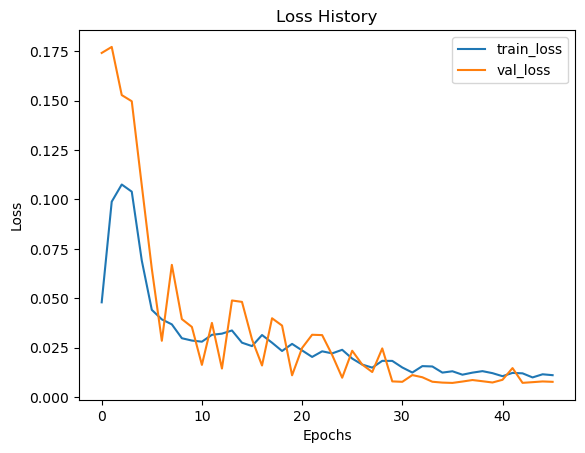

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

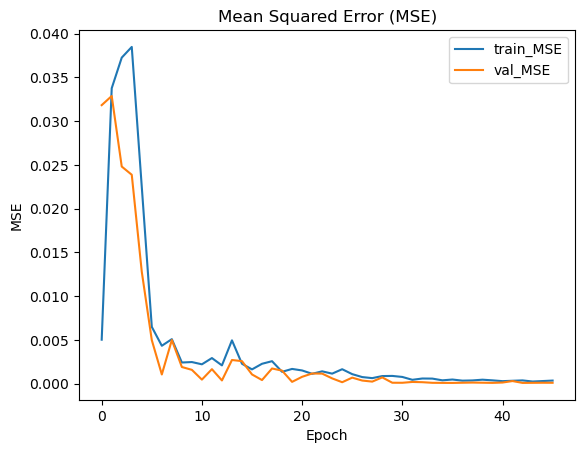

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

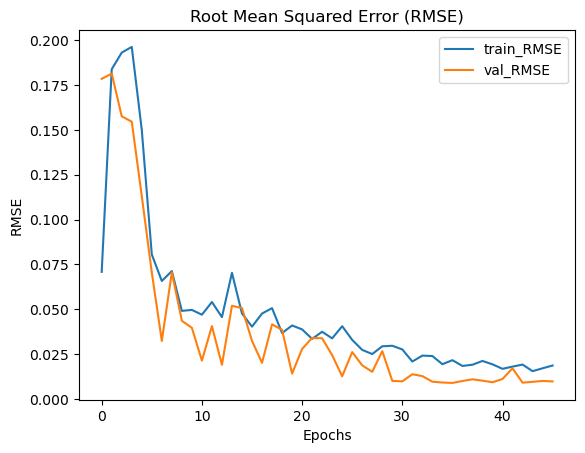

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

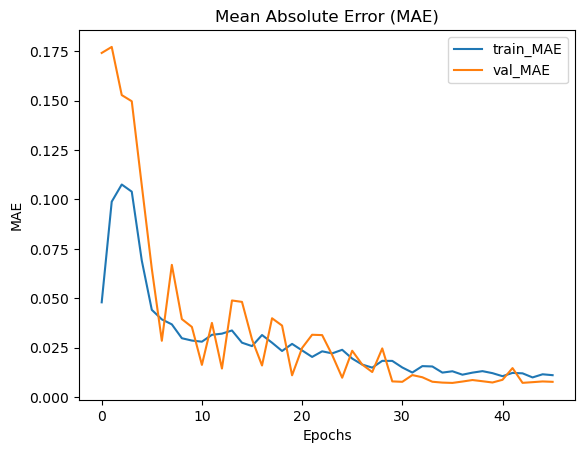

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

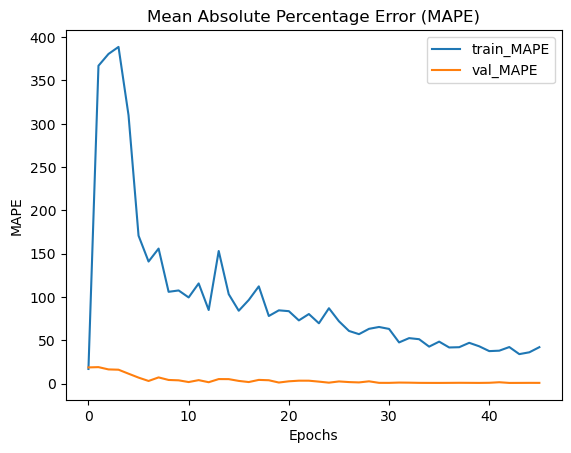

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:49:42.309542: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


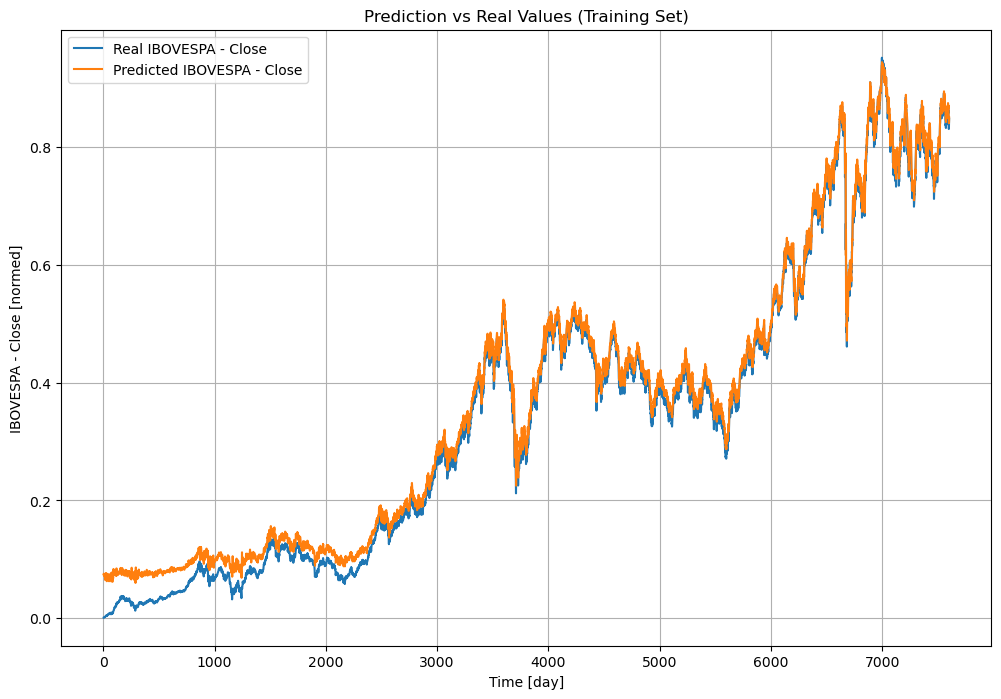

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


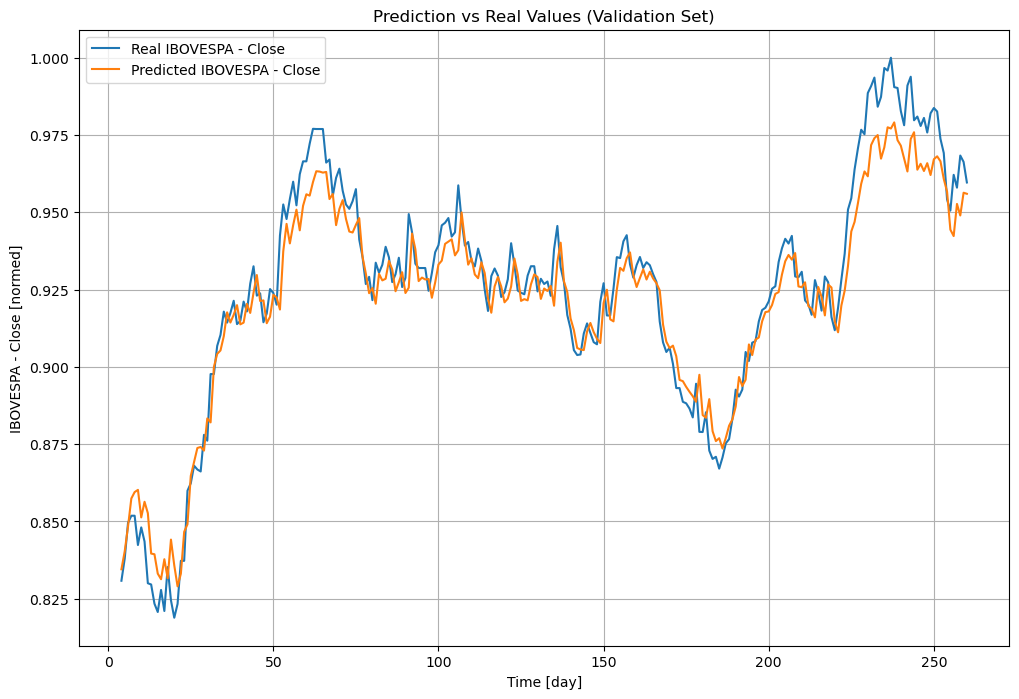

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


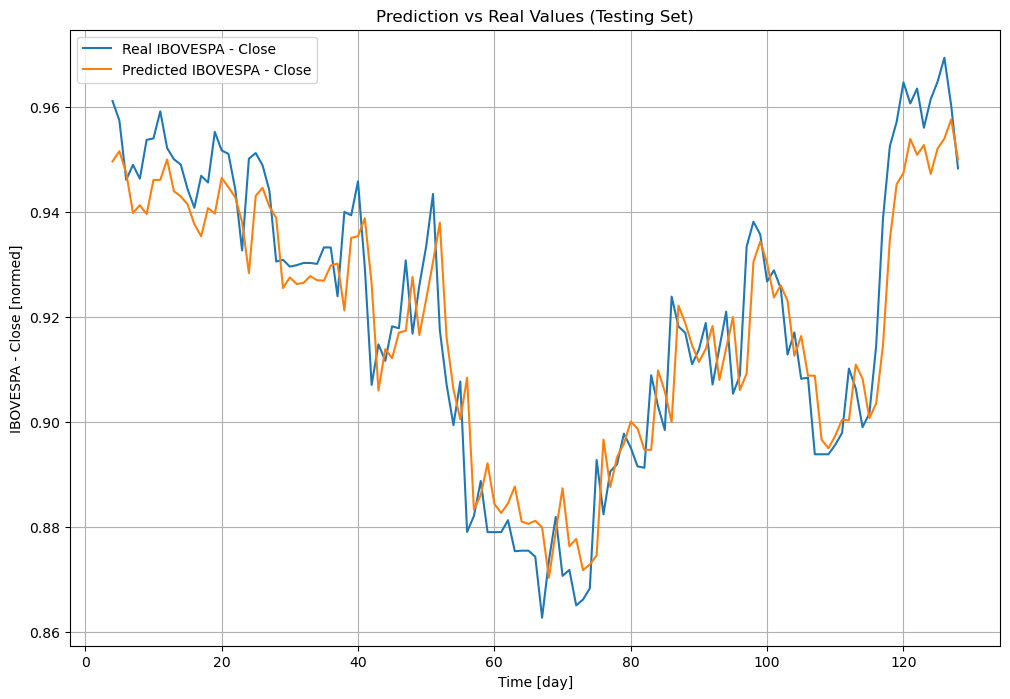

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

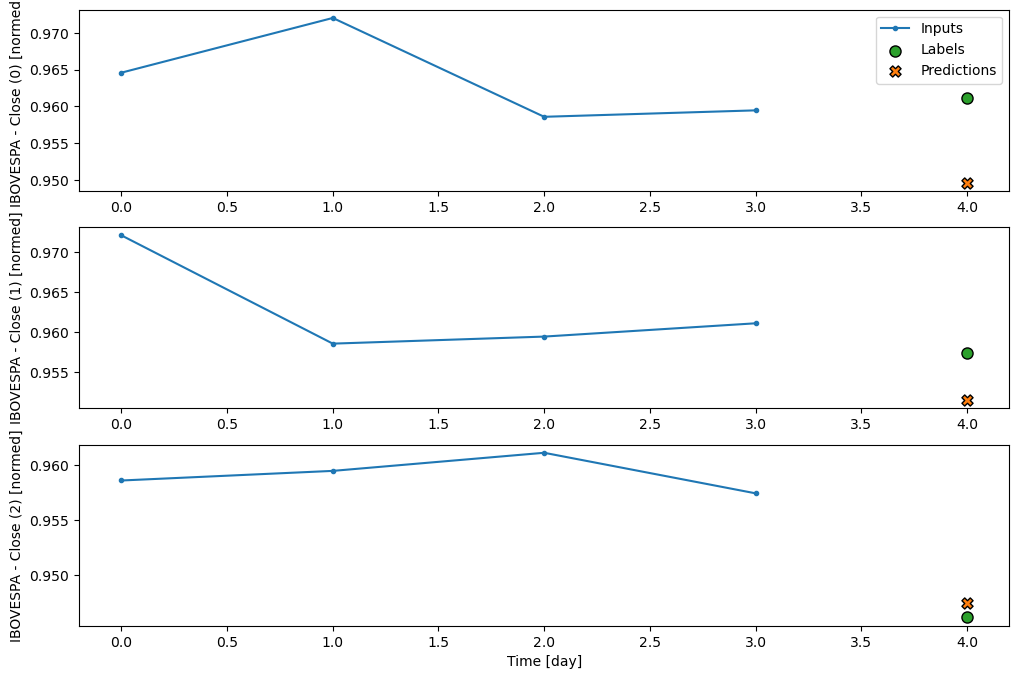

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:2s:895ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


array([[[0.94962054, 0.94962054, 0.94962054, ..., 0.94962054,
         0.94962054, 0.94962054]],

       [[0.95157266, 0.95157266, 0.95157266, ..., 0.95157266,
         0.95157266, 0.95157266]],

       [[0.9474456 , 0.9474456 , 0.9474456 , ..., 0.9474456 ,
         0.9474456 , 0.9474456 ]],

       ...,

       [[0.9539587 , 0.9539587 , 0.9539587 , ..., 0.9539587 ,
         0.9539587 , 0.9539587 ]],

       [[0.95762664, 0.95762664, 0.95762664, ..., 0.95762664,
         0.95762664, 0.95762664]],

       [[0.949953  , 0.949953  , 0.949953  , ..., 0.949953  ,
         0.949953  , 0.949953  ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')